# **Image Classification using Convolution Neural Network**

In [ ]:
#import necessary packages to build a tensorflow model 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import os

from os import listdir 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import google drive and specify path to dataset 
from google.colab import drive
drive.mount("drive") 
print("drive mounted")
path = 'drive/My Drive/CIS 579/Project/dataset/hw2/images'
#print(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive
drive mounted


**Import Dataset**

* Google Images was used to collect the dataset for Pizza, and notPizza cateogy. Initally, only one class identification was going to be conducted; however, I discovered that 2 or more classes are required for image classification. There is a possible approach to 1-class identification (One Class SVM) using Sci-Kit library. One class SVM is generally used to detect anomalies. 

In [ ]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

#Identify Paths for both classes separately 
train_pizza_dir = os.path.join(train_dir, 'pizza')  
train_notpizza_dir = os.path.join(train_dir, 'notpizza')  

validation_pizza_dir = os.path.join(validation_dir, 'pizza') 
validation_notpizza_dir = os.path.join(validation_dir, 'notpizza')  

num_pizza_tr = len(os.listdir(train_pizza_dir))
num_notpizza_tr = len(os.listdir(train_notpizza_dir))

num_pizza_val = len(os.listdir(validation_pizza_dir))
num_notpizza_val = len(os.listdir(validation_notpizza_dir))

total_train = num_pizza_tr + num_notpizza_tr
total_val = num_pizza_val + num_notpizza_val

print("Total Number of Pizza's Training  Images:", num_pizza_tr)
print("--")
print("Total Number of Pizza's Validation Images:", num_pizza_val)


Total Number of Pizza's Training  Images: 250
--
Total Number of Pizza's Validation Images: 178


Text(0.5, 1.0, 'Sample Image from Not Pizza Class')

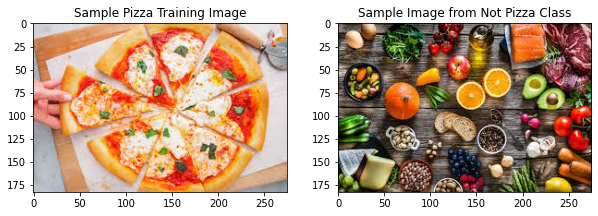

In [ ]:
train_class_a = mpimg.imread('drive/My Drive/CIS 579/Project/dataset/hw2/images/train/pizza/pizza34.jpg')
train_class_b = mpimg.imread('drive/My Drive/CIS 579/Project/dataset/hw2/images/train/notpizza/notpizza34.jpg')
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(train_class_a)
plt.title('Sample Pizza Training Image')
plt.subplot(1,2,2)
plt.imshow(train_class_b)
plt.title('Sample Image from Not Pizza Class')

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [ ]:
batch_size = 32
epochs = 15
image_height = 150
image_width = 150

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory=train_dir, shuffle=True,
                                                           target_size=(image_height, image_width), class_mode='binary')


val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, directory=validation_dir, 
                                                              target_size=(image_height, image_width), class_mode='binary')


Found 570 images belonging to 2 classes.
Found 298 images belonging to 2 classes.


In [ ]:
 model = Sequential([
   Conv2D(32, (3,3), activation='relu', input_shape=(image_height, image_width, 3)), # RGB
   MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  # Downsizes images by 1/2 in this layer

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Flattens layers from 3D to 1D further compressing features
    Flatten(),

    # Regular densely connected layer
    Dense(128, activation='relu'),

    # Dropout layer helps avoid over fitting by randomly setting 50% of the inputs to 0
    Dropout(0.5),
    # Output layer
    Dense(2, activation='softmax'),
   ])


In [ ]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
17/17 [==============================] - 27s 2s/step - loss: 0.6734 - accuracy: 0.5632 - val_loss: 0.7188 - val_accuracy: 0.4097
Epoch 2/15
17/17 [==============================] - 25s 1s/step - loss: 0.5897 - accuracy: 0.6710 - val_loss: 0.7599 - val_accuracy: 0.5799
Epoch 3/15
17/17 [==============================] - 25s 1s/step - loss: 0.5554 - accuracy: 0.7119 - val_loss: 0.8102 - val_accuracy: 0.5625
Epoch 4/15
17/17 [==============================] - 25s 1s/step - loss: 0.5218 - accuracy: 0.7361 - val_loss: 0.6068 - val_accuracy: 0.7014
Epoch 5/15
17/17 [==============================] - 25s 1s/step - loss: 0.4687 - accuracy: 0.7621 - val_loss: 0.6841 - val_accuracy: 0.6910
Epoch 6/15
17/17 [==============================] - 25s 1s/step - loss: 0.4081 - accuracy: 0.8160 - val_loss: 0.8523 - val_accuracy: 0.6458
Epoch 7/15
17/17 [==============================] - 25s 1s/step - loss: 0.3893 - accuracy: 0.8141 - val_loss: 0.6161 - val_accuracy: 0.7500
Epoch 8/15
17/17 [==

Text(0.5, 1.0, 'Training and Validation Accuracy')

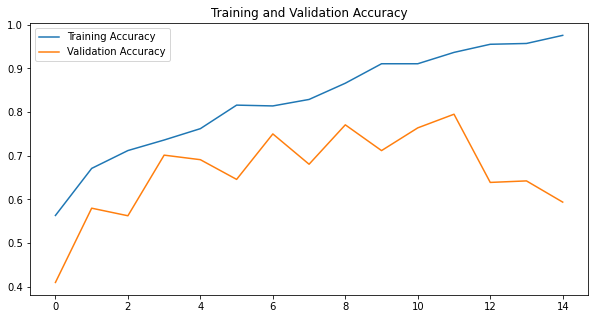

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')


In [ ]:
model.save('drive/My Drive/CIS 579/Project/hw2.h5')


# **Prediction**

* It can be observed that our CNN is highly accurate with apprximately 97% accuracy in identifying our Pizza Class. When the model was used to test prediction, it provides accurate results as expected. The images used for prediction were neither in Training, or Validation dataset. 

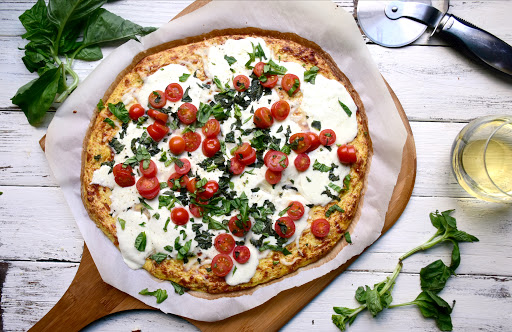

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

## Save the model as .h5 format that Keras supports, and re-compile to use for prediction 
model= tf.keras.models.load_model("drive/My Drive/CIS 579/Project/keras.h5")

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread('drive/My Drive/CIS 579/Project/dataset/hw2/0.jpg')
cv2_imshow(img)

img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])


In [ ]:
predict = model.predict_proba(img)
print(predict)

#predict = model.predict_proba(img2)
#print(predict)

[[0.5248848  0.47511524]]


Model predicts with 52% of confidence that above picture is Pizza. 